# **Exploratory Data Analysis (EDA) of World's Tallest Buildings**.

- ## Author: Muhammad Altaf Samin
- ## Location: Pakistan

> LinkedIn: [Link](https://www.linkedin.com/in/muhammad-altaf-samin-862925342?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)

> GitHub: [Link](https://github.com/muhammad-altaf-samin)

- Date: 12/29/2025

**About Dataset**

[Link](https://www.kaggle.com/datasets/hammadfarooq470/top-100-tallest-buildings-worldwide/data)

***Top 100 Tallest Buildings in the World (City, Country & Continent)***

`Description`

This dataset contains information about the top 100 tallest buildings in the world. It includes the following fields:

`Building Name:` The official name of the skyscraper.
`City:` The city where the building is located.
`Country:` The country of the building.
`Continent:` The continent of the building's location.

*The data is ideal for:*

- Geographical analysis of skyscrapers worldwide
- Urban planning and architecture studies
- Data visualization and EDA projects
- Machine learning projects related to city or building statistics
  

`Sources`

- CTBUH (Council on Tall Buildings and Urban Habitat)
- Wikipedia (2024–2025 rankings)

`Usage`

You can use this dataset to analyze the distribution of tall buildings across countries and continents.
It can also be combined with other datasets for projects on city infrastructure, population density, or economic studies.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("./Dataset/top_100_tallest_buildings_world.csv")

In [4]:
df.head()

,Building Name,City,Country,Continent
0,Burj Khalifa,Dubai,United Arab Emirates,Asia
1,Merdeka 118,Kuala Lumpur,Malaysia,Asia
2,Shanghai Tower,Shanghai,China,Asia
3,Abraj Al-Bait Clock Tower,Mecca,Saudi Arabia,Asia
4,Ping An Finance Centre,Shenzhen,China,Asia


In [5]:
# shape of the dataset
df.shape

(74, 4)

In [6]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Building Name  74 non-null     object
 1   City           74 non-null     object
 2   Country        74 non-null     object
 3   Continent      74 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


In [7]:
# Check for missing values
df.isnull().sum()

Building Name    0
City             0
Country          0
Continent        0
dtype: int64

**Data Visulization**

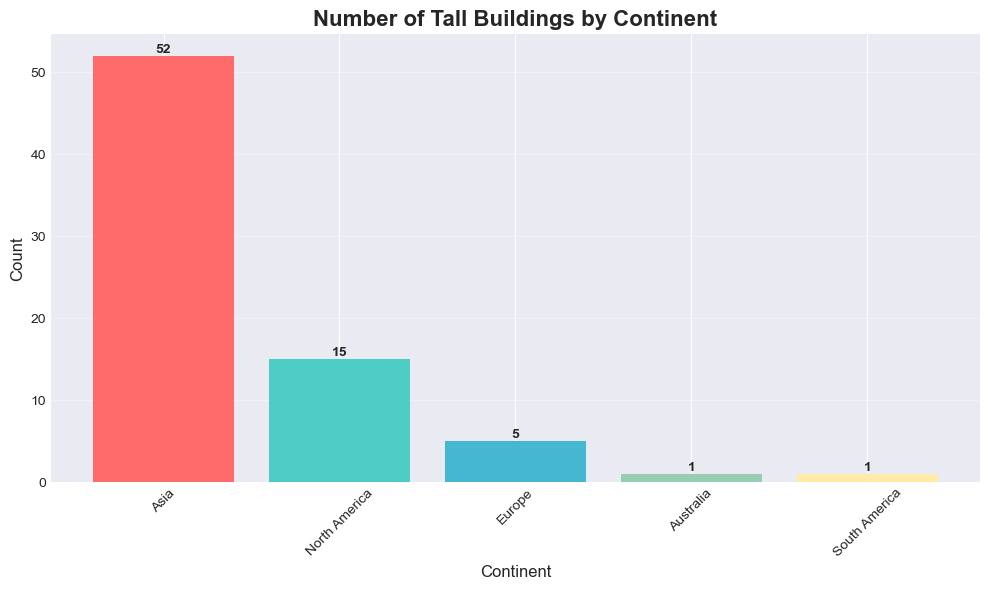

In [8]:
# 1. Continent Distribution - Bar Chart
plt.figure(figsize=(10, 6))
continent_counts = df['Continent'].value_counts()
bars = plt.bar(continent_counts.index, continent_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Number of Tall Buildings by Continent', fontsize=16, fontweight='bold')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

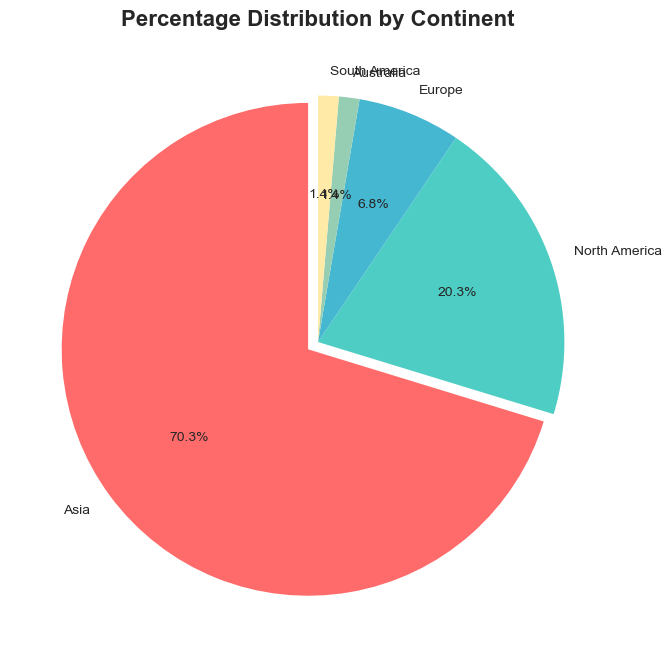

In [9]:
# 2. Continent Distribution - Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'], 
        startangle=90, explode=[0.05, 0, 0, 0, 0])
plt.title('Percentage Distribution by Continent', fontsize=16, fontweight='bold')
plt.show()

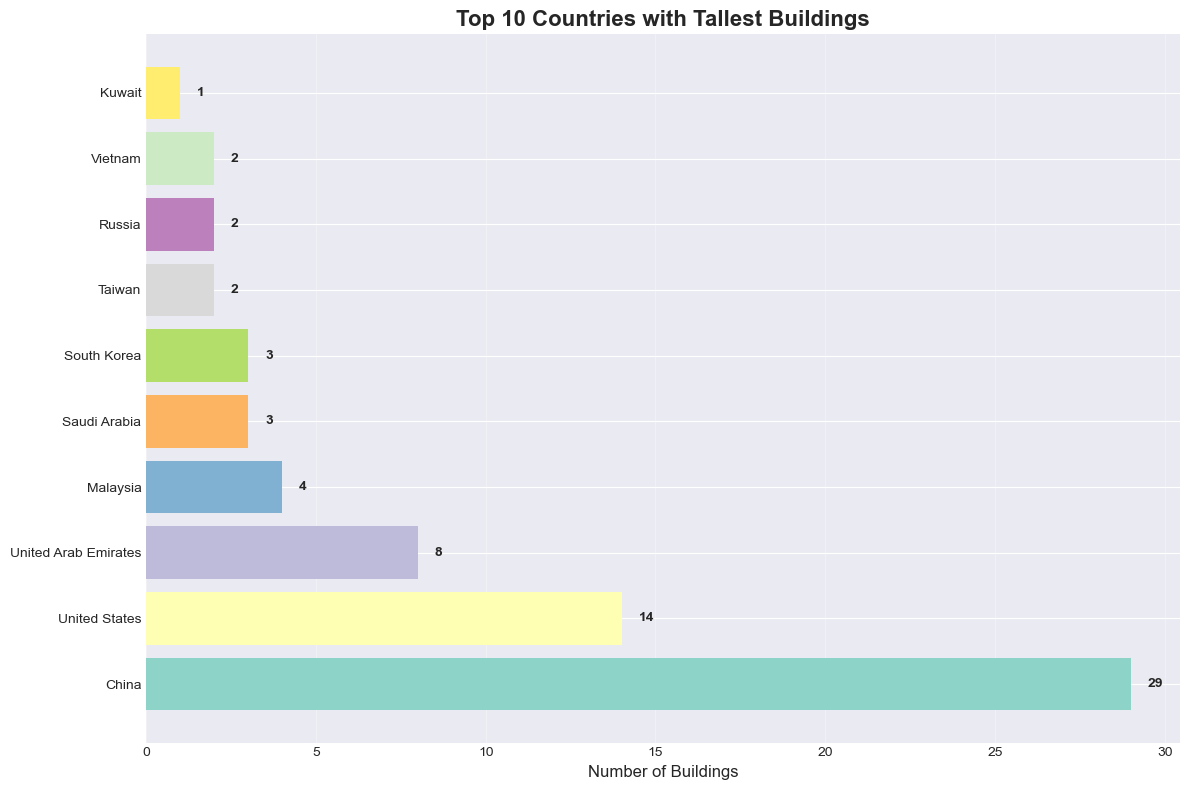

In [10]:
# 3. Top 10 Countries - Horizontal Bar Chart
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts().head(10)
bars = plt.barh(range(len(country_counts)), country_counts.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(country_counts))))
plt.yticks(range(len(country_counts)), country_counts.index)
plt.xlabel('Number of Buildings', fontsize=12)
plt.title('Top 10 Countries with Tallest Buildings', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, (country, count) in enumerate(zip(country_counts.index, country_counts.values)):
    plt.text(count + 0.5, i, f'{count}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

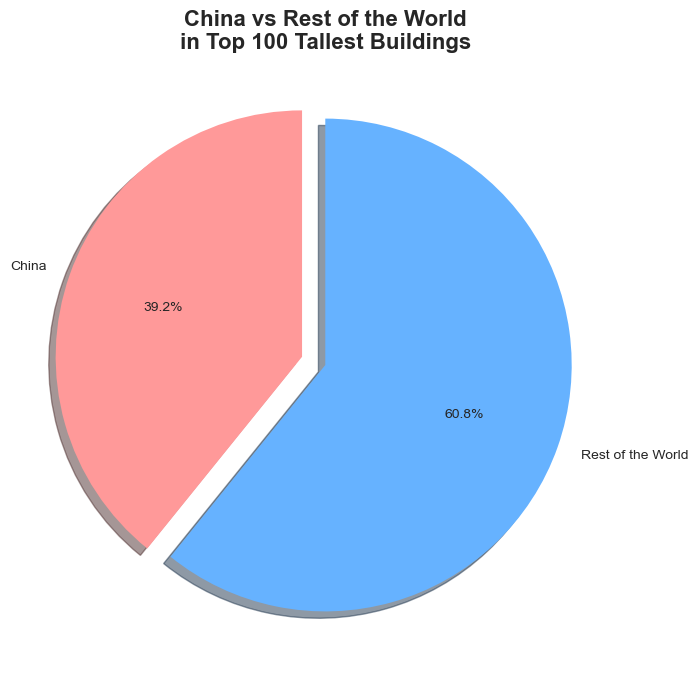

In [11]:
# 4. China vs Rest of the World
plt.figure(figsize=(8, 8))
china_count = df[df['Country'] == 'China'].shape[0]
other_count = df.shape[0] - china_count
labels = ['China', 'Rest of the World']
sizes = [china_count, other_count]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('China vs Rest of the World\nin Top 100 Tallest Buildings', 
          fontsize=16, fontweight='bold')
plt.show()


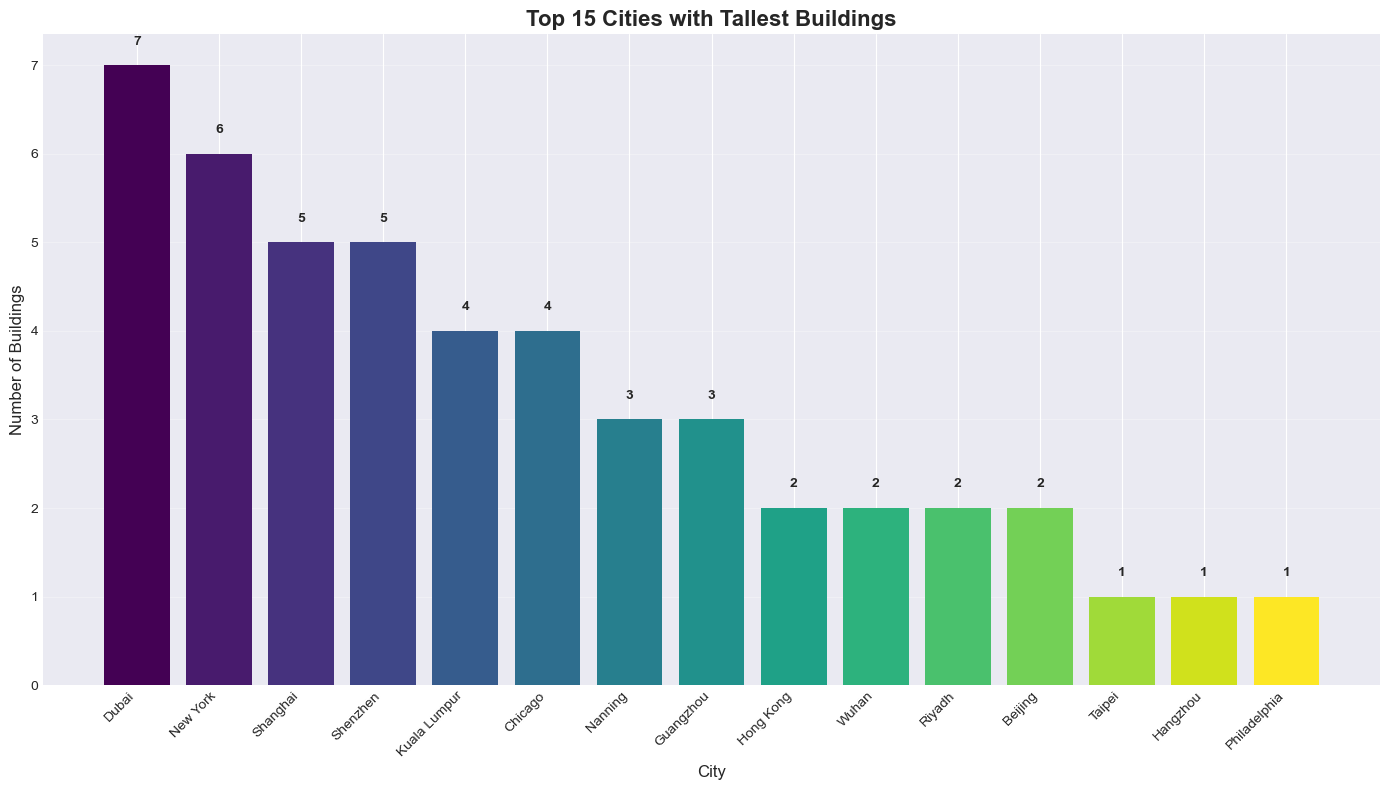

In [12]:
# 5. Top 15 Cities
plt.figure(figsize=(14, 8))
city_counts = df['City'].value_counts().head(15)

bars = plt.bar(range(len(city_counts)), city_counts.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(city_counts))))
plt.xticks(range(len(city_counts)), city_counts.index, rotation=45, ha='right')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Top 15 Cities with Tallest Buildings', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

for i, count in enumerate(city_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

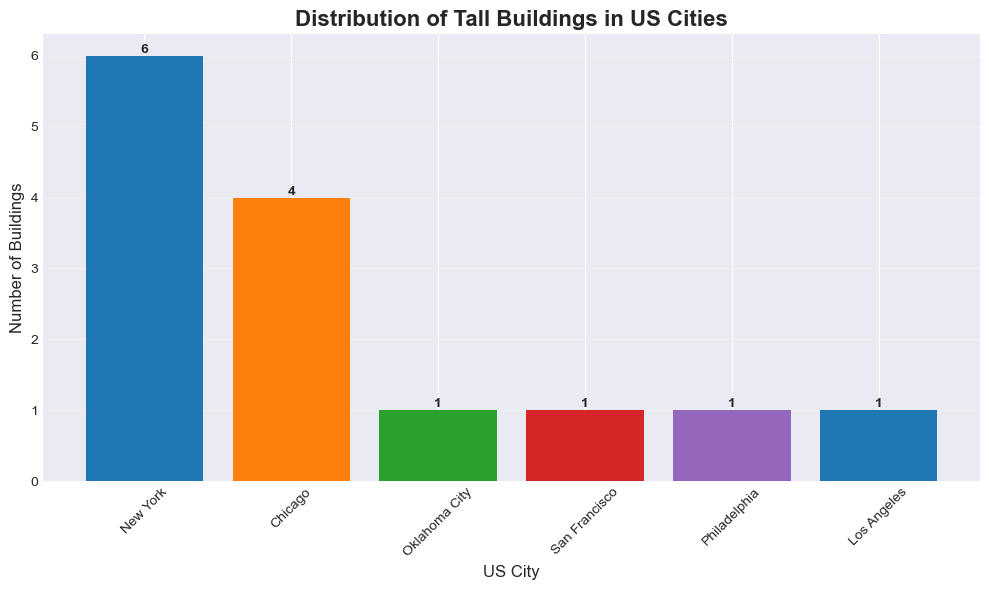

In [13]:
# 6. US Cities Analysis
plt.figure(figsize=(10, 6))
us_buildings = df[df['Country'] == 'United States']
us_city_counts = us_buildings['City'].value_counts()

bars = plt.bar(us_city_counts.index, us_city_counts.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('US City', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Distribution of Tall Buildings in US Cities', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

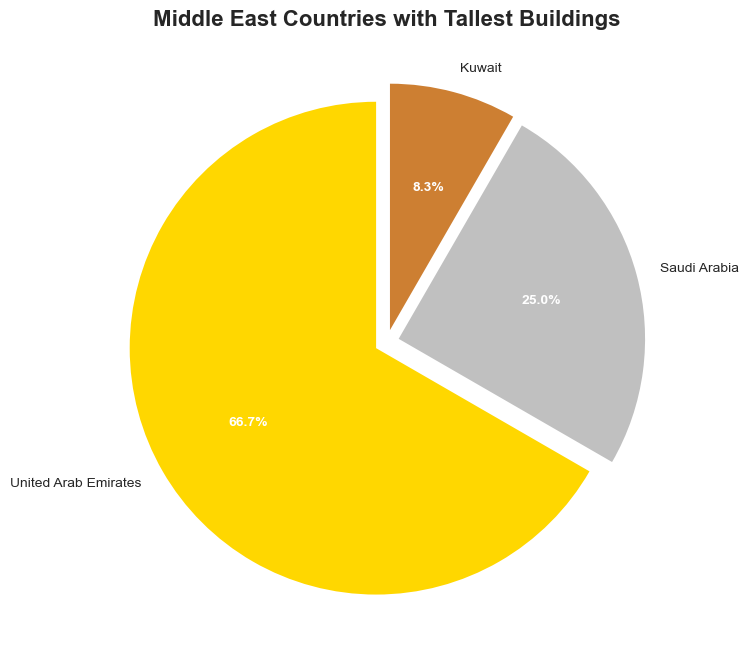

In [14]:
# 7. Middle East Countries
plt.figure(figsize=(8, 8))
middle_east_countries = ['United Arab Emirates', 'Saudi Arabia', 'Kuwait']
middle_east_data = df[df['Country'].isin(middle_east_countries)]
me_counts = middle_east_data['Country'].value_counts()
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

wedges, texts, autotexts = plt.pie(me_counts.values, labels=me_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90,
                                   explode=[0.05, 0.05, 0.05])
plt.title('Middle East Countries with Tallest Buildings', fontsize=16, fontweight='bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.show()

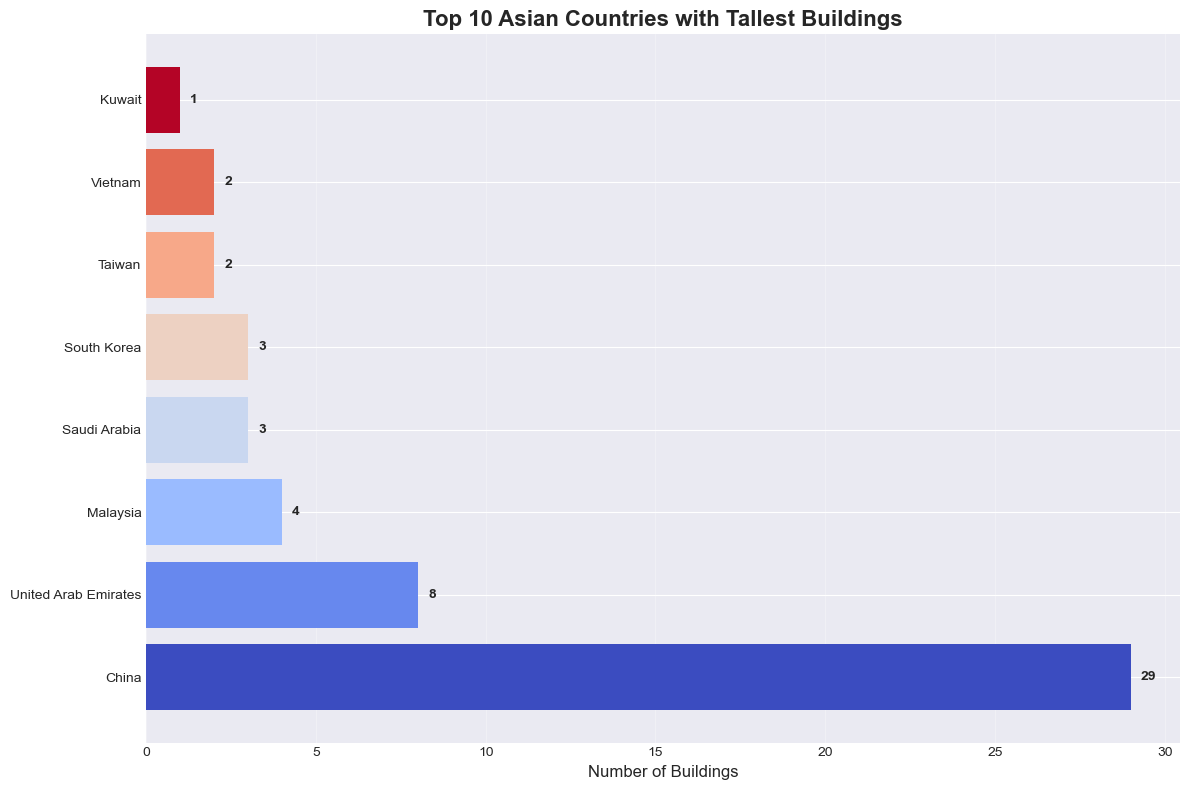

In [15]:
# 8. Asian Countries Analysis
plt.figure(figsize=(12, 8))
asian_countries = df[df['Continent'] == 'Asia']['Country'].value_counts().head(10)

bars = plt.barh(range(len(asian_countries)), asian_countries.values,
                color=plt.cm.coolwarm(np.linspace(0, 1, len(asian_countries))))
plt.yticks(range(len(asian_countries)), asian_countries.index)
plt.xlabel('Number of Buildings', fontsize=12)
plt.title('Top 10 Asian Countries with Tallest Buildings', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, count in enumerate(asian_countries.values):
    plt.text(count + 0.3, i, f'{count}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

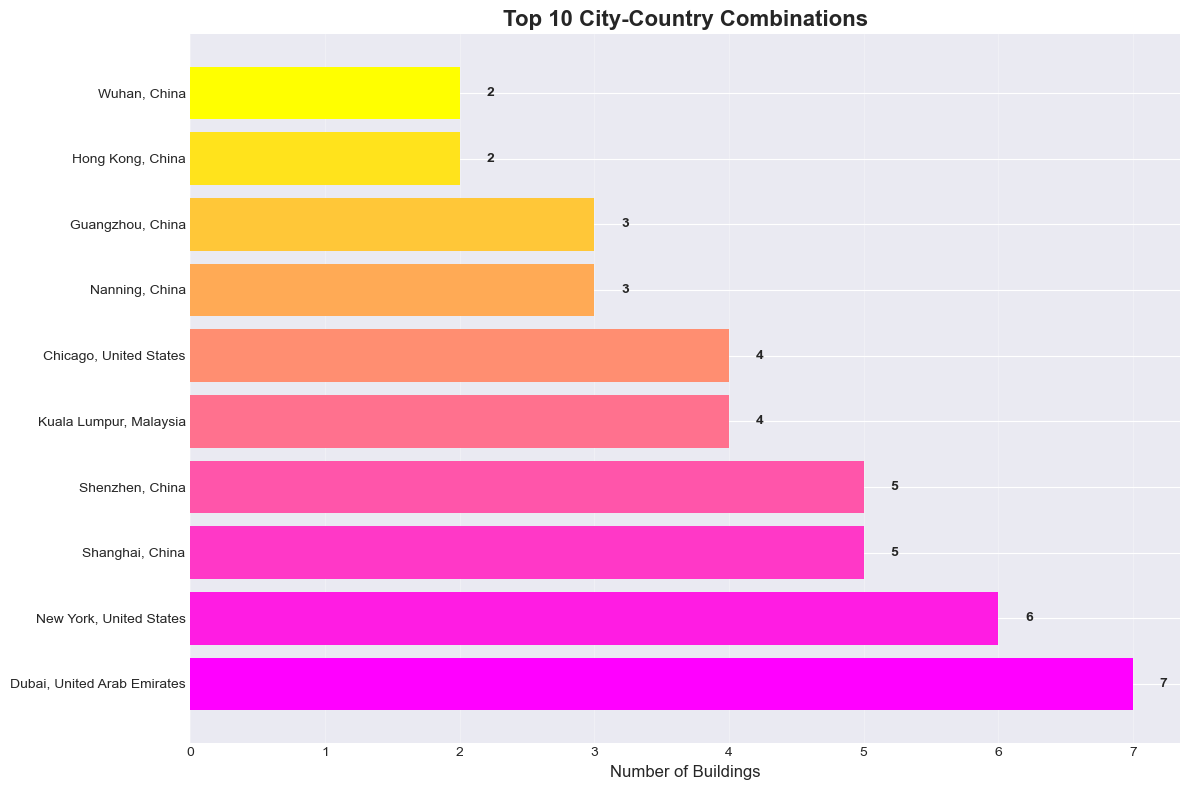

In [16]:
# 9. City-Country Combination Analysis
plt.figure(figsize=(12, 8))
df['City_Country'] = df['City'] + ', ' + df['Country']
city_country_counts = df['City_Country'].value_counts().head(10)

bars = plt.barh(range(len(city_country_counts)), city_country_counts.values,
                color=plt.cm.spring(np.linspace(0, 1, len(city_country_counts))))
plt.yticks(range(len(city_country_counts)), city_country_counts.index)
plt.xlabel('Number of Buildings', fontsize=12)
plt.title('Top 10 City-Country Combinations', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, count in enumerate(city_country_counts.values):
    plt.text(count + 0.2, i, str(count), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

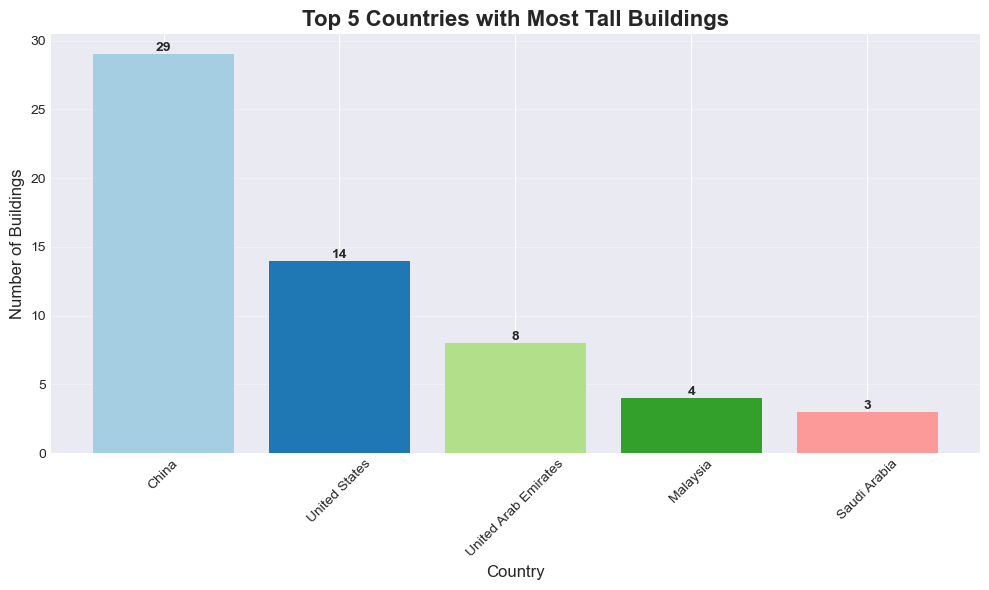

In [17]:
# 10. Country Distribution for Top 5
plt.figure(figsize=(10, 6))
top_5_countries = df['Country'].value_counts().head(5)
colors = plt.cm.Paired(range(len(top_5_countries)))

bars = plt.bar(top_5_countries.index, top_5_countries.values, color=colors)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Top 5 Countries with Most Tall Buildings', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

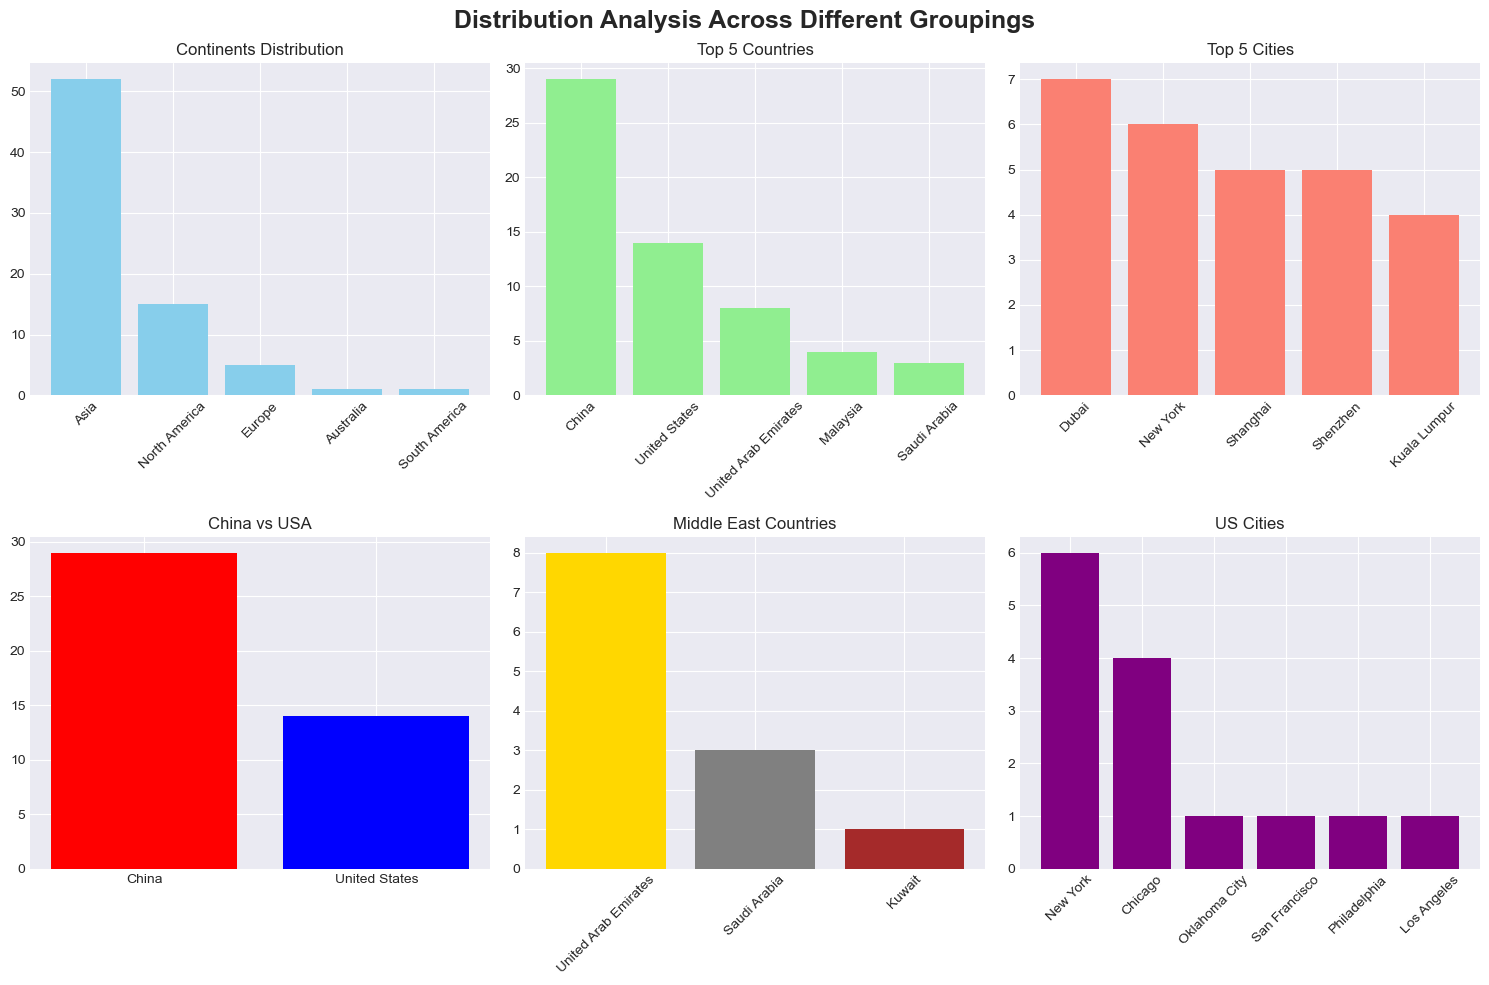

In [18]:
# 11. Distribution across Continents - Detailed
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Analysis Across Different Groupings', fontsize=18, fontweight='bold')

# Continent distribution
continents = df['Continent'].value_counts()
axes[0, 0].bar(continents.index, continents.values, color='skyblue')
axes[0, 0].set_title('Continents Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Top 5 countries
top5 = df['Country'].value_counts().head(5)
axes[0, 1].bar(top5.index, top5.values, color='lightgreen')
axes[0, 1].set_title('Top 5 Countries')
axes[0, 1].tick_params(axis='x', rotation=45)

# Top 5 cities
top5_cities = df['City'].value_counts().head(5)
axes[0, 2].bar(top5_cities.index, top5_cities.values, color='salmon')
axes[0, 2].set_title('Top 5 Cities')
axes[0, 2].tick_params(axis='x', rotation=45)

# China vs USA comparison
china_usa = df[df['Country'].isin(['China', 'United States'])]['Country'].value_counts()
axes[1, 0].bar(china_usa.index, china_usa.values, color=['red', 'blue'])
axes[1, 0].set_title('China vs USA')

# Middle East countries
me_data = df[df['Country'].isin(['United Arab Emirates', 'Saudi Arabia', 'Kuwait'])]
me_counts = me_data['Country'].value_counts()
axes[1, 1].bar(me_counts.index, me_counts.values, color=['gold', 'gray', 'brown'])
axes[1, 1].set_title('Middle East Countries')
axes[1, 1].tick_params(axis='x', rotation=45)

# US Cities
us_cities = df[df['Country'] == 'United States']['City'].value_counts()
axes[1, 2].bar(us_cities.index, us_cities.values, color='purple')
axes[1, 2].set_title('US Cities')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


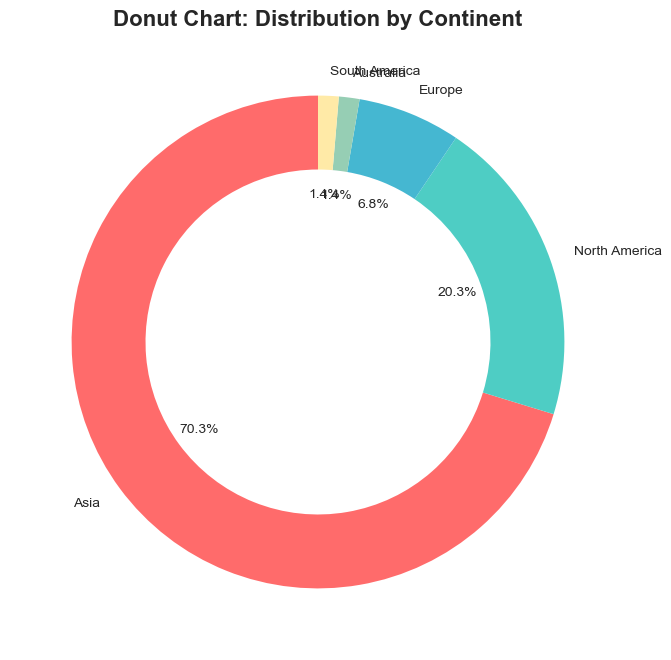

In [19]:
# 12. Percentage Distribution by Continent - Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'], 
        startangle=90, wedgeprops=dict(width=0.3))
plt.title('Donut Chart: Distribution by Continent', fontsize=16, fontweight='bold')
plt.show()

<Figure size 1400x800 with 0 Axes>

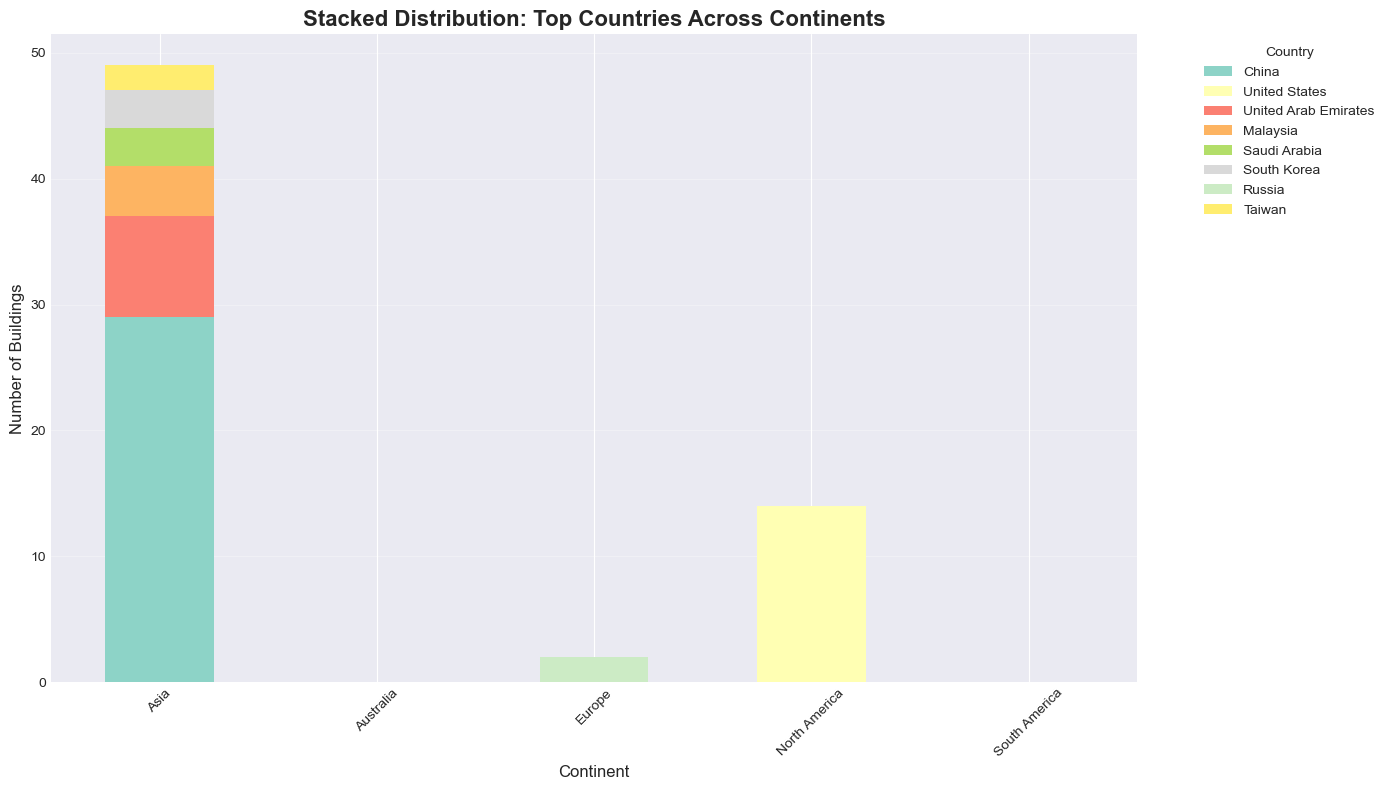

In [20]:
# 13. Stacked Bar Chart - Countries by Continent
plt.figure(figsize=(14, 8))
continent_country = df.groupby(['Continent', 'Country']).size().unstack(fill_value=0)
top_countries_per_continent = continent_country.sum().nlargest(8).index
continent_country[top_countries_per_continent].plot(kind='bar', stacked=True, 
                                                     colormap='Set3', figsize=(14, 8))
plt.title('Stacked Distribution: Top Countries Across Continents', fontsize=16, fontweight='bold')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


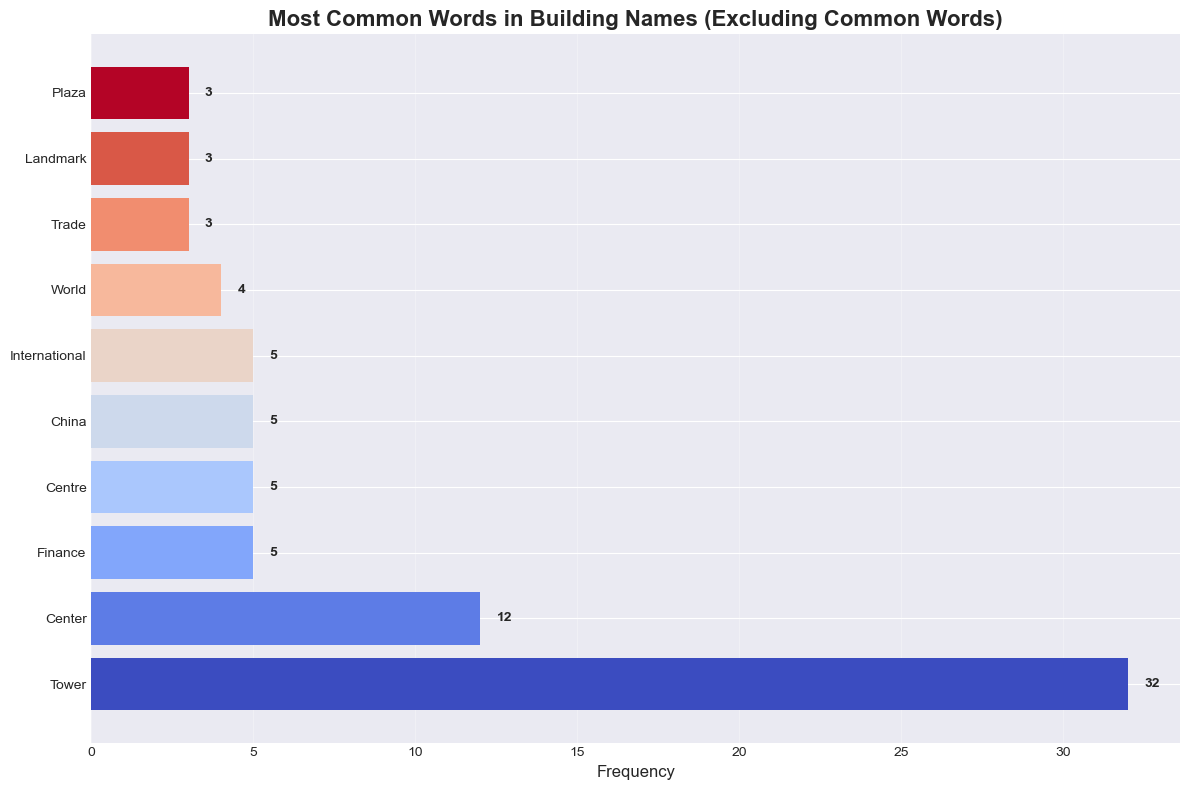

In [21]:
# 14. Building Name Analysis - Common Words
from collections import Counter
import re

plt.figure(figsize=(12, 8))
all_words = []
for name in df['Building Name']:
    words = re.findall(r'\b[A-Z][a-z]*\b', name)
    all_words.extend([word for word in words if word not in ['The', 'And', 'Of', 'By', 'In']])

word_counts = Counter(all_words)
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

bars = plt.barh(words, counts, color=plt.cm.coolwarm(np.linspace(0, 1, len(words))))
plt.xlabel('Frequency', fontsize=12)
plt.title('Most Common Words in Building Names (Excluding Common Words)', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, (word, count) in enumerate(zip(words, counts)):
    plt.text(count + 0.5, i, f'{count}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


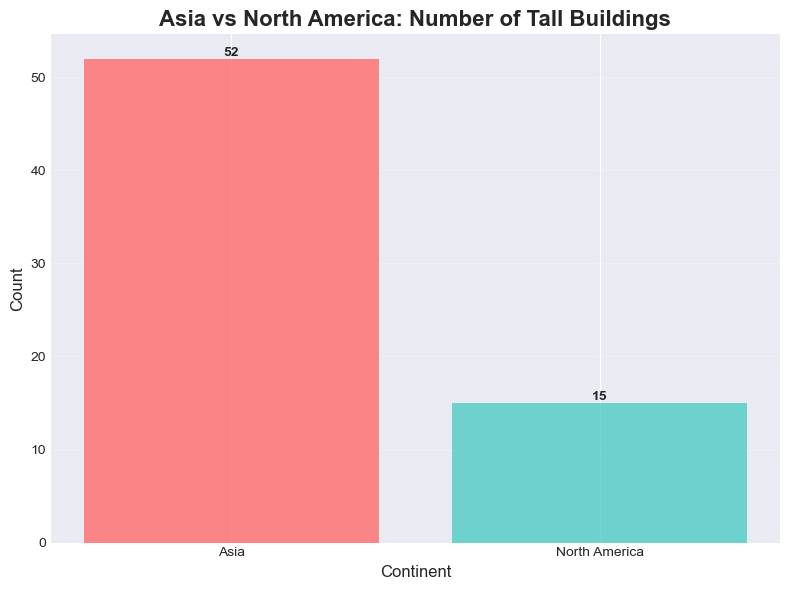

In [22]:
# 15. Comparison: Asia vs North America
plt.figure(figsize=(8, 6))
asia_na = df[df['Continent'].isin(['Asia', 'North America'])]
comparison_data = asia_na['Continent'].value_counts()

bars = plt.bar(comparison_data.index, comparison_data.values, 
               color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
plt.title('Asia vs North America: Number of Tall Buildings', fontsize=16, fontweight='bold')
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
print("\n" + "=" * 80)
print("KEY INSIGHTS AND ANSWERS")
print("=" * 80)



KEY INSIGHTS AND ANSWERS


In [24]:
print("\n1. Continent with most buildings:")
print(f"   Asia dominates with {continent_counts['Asia']} buildings")


1. Continent with most buildings:
   Asia dominates with 52 buildings


In [25]:
print("\n2. Country dominating the list:")
print(f"   China leads with {df[df['Country'] == 'China'].shape[0]} buildings")



2. Country dominating the list:
   China leads with 29 buildings


In [26]:
print("\n3. City with highest concentration:")
top_city = df['City'].value_counts().index[0]
top_city_count = df['City'].value_counts().iloc[0]
print(f"   {top_city} has {top_city_count} buildings")



3. City with highest concentration:
   Dubai has 7 buildings


In [27]:
print("\n4. Number of buildings by country (Top 5):")
for i, (country, count) in enumerate(df['Country'].value_counts().head(5).items(), 1):
    print(f"   {i}. {country}: {count} buildings")


4. Number of buildings by country (Top 5):
   1. China: 29 buildings
   2. United States: 14 buildings
   3. United Arab Emirates: 8 buildings
   4. Malaysia: 4 buildings
   5. Saudi Arabia: 3 buildings


In [28]:
print("\n5. Distribution across continents:")
for continent, count in continent_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {continent}: {count} buildings ({percentage:.1f}%)")


5. Distribution across continents:
   Asia: 52 buildings (70.3%)
   North America: 15 buildings (20.3%)
   Europe: 5 buildings (6.8%)
   Australia: 1 buildings (1.4%)
   South America: 1 buildings (1.4%)


In [29]:
print("\n6. Cities with multiple buildings:")
multi_city = df['City'].value_counts()[df['City'].value_counts() > 1]
print(f"   {len(multi_city)} cities have more than 1 building")
print(f"   Top: {multi_city.index[0]} with {multi_city.iloc[0]} buildings")



6. Cities with multiple buildings:
   12 cities have more than 1 building
   Top: Dubai with 7 buildings


In [30]:
print("\n7. China vs others:")
china_count = df[df['Country'] == 'China'].shape[0]
print(f"   China has {china_count} buildings")
print(f"   Rest of world has {len(df) - china_count} buildings")



7. China vs others:
   China has 29 buildings
   Rest of world has 45 buildings


In [31]:
print("\n8. Asian countries represented:")
asian_countries = df[df['Continent'] == 'Asia']['Country'].unique()
print(f"   {len(asian_countries)} Asian countries in the list")


8. Asian countries represented:
   8 Asian countries in the list


In [32]:
print("\n9. Middle East countries:")
me_countries = ['United Arab Emirates', 'Saudi Arabia', 'Kuwait']
me_counts = df[df['Country'].isin(me_countries)]['Country'].value_counts()
for country, count in me_counts.items():
    print(f"   {country}: {count} buildings")


9. Middle East countries:
   United Arab Emirates: 8 buildings
   Saudi Arabia: 3 buildings
   Kuwait: 1 buildings


In [33]:
print("\n10. Asia vs North America comparison:")
asia_count = continent_counts['Asia']
na_count = continent_counts['North America']
print(f"   Asia: {asia_count} buildings")
print(f"   North America: {na_count} buildings")
print(f"   Ratio: {asia_count/na_count:.1f}:1")


10. Asia vs North America comparison:
   Asia: 52 buildings
   North America: 15 buildings
   Ratio: 3.5:1


In [34]:
print("\n11. European countries:")
euro_countries = df[df['Continent'] == 'Europe']['Country'].unique()
print(f"   {len(euro_countries)} European countries: {', '.join(euro_countries)}")


11. European countries:
   4 European countries: Russia, United Kingdom, Poland, Sweden


In [35]:
print("\n12. Buildings from South America/Australia:")
sa_count = continent_counts.get('South America', 0)
aus_count = continent_counts.get('Australia', 0)
print(f"   South America: {sa_count} building")
print(f"   Australia: {aus_count} building")


12. Buildings from South America/Australia:
   South America: 1 building
   Australia: 1 building


In [36]:
print("\n13. Top 5 cities:")
for i, (city, count) in enumerate(df['City'].value_counts().head(5).items(), 1):
    print(f"   {i}. {city}: {count} buildings")


13. Top 5 cities:
   1. Dubai: 7 buildings
   2. New York: 6 buildings
   3. Shanghai: 5 buildings
   4. Shenzhen: 5 buildings
   5. Kuala Lumpur: 4 buildings


In [37]:
print(f"\n14. Percentage from Asia: {(asia_count/len(df)*100):.1f}%")


14. Percentage from Asia: 70.3%


In [38]:
print(f"\n15. Buildings from UAE: {df[df['Country'] == 'United Arab Emirates'].shape[0]}")


15. Buildings from UAE: 8


In [39]:
print("\n16. US cities with buildings:")
us_cities = df[df['Country'] == 'United States']['City'].unique()
print(f"   {len(us_cities)} US cities: {', '.join(us_cities)}")


16. US cities with buildings:
   6 US cities: New York, Chicago, Oklahoma City, San Francisco, Philadelphia, Los Angeles


In [40]:
print(f"\n17. Twin buildings identified:")
twin_buildings = df[df['Building Name'].str.contains('Twin|Tower 1|Tower 2')]
print(f"   {len(twin_buildings)} buildings with 'Twin' or 'Tower 1/2' in name")


17. Twin buildings identified:
   2 buildings with 'Twin' or 'Tower 1/2' in name


In [41]:
print("\n18. Country diversity per continent:")
for continent in df['Continent'].unique():
    countries_in_continent = df[df['Continent'] == continent]['Country'].nunique()
    print(f"   {continent}: {countries_in_continent} countries")


18. Country diversity per continent:
   Asia: 8 countries
   North America: 2 countries
   Europe: 4 countries
   Australia: 1 countries
   South America: 1 countries


In [42]:
print("\n19. Building naming patterns:")
common_words = ['Tower', 'Center', 'Finance', 'International', 'World']
for word in common_words:
    count = df['Building Name'].str.contains(word).sum()
    print(f"   '{word}' appears in {count} building names")


19. Building naming patterns:
   'Tower' appears in 33 building names
   'Center' appears in 12 building names
   'Finance' appears in 5 building names
   'International' appears in 5 building names
   'World' appears in 4 building names


In [43]:
print("\n20. Geographic concentration:")
top_3_countries = df['Country'].value_counts().head(3).sum()
percentage_top_3 = (top_3_countries / len(df)) * 100
print(f"   Top 3 countries contain {percentage_top_3:.1f}% of all buildings")


20. Geographic concentration:
   Top 3 countries contain 68.9% of all buildings


# Key Takeaways

- Asia is the new epicenter of skyscraper development

- China's dominance is unprecedented (27% of top 100)

- Urban concentration is extreme (few cities have multiple buildings)

- Economic function evident in building names and locations

- Geographic inequality in skyscraper distribution mirrors global economic inequality

